# Assignment 1 - Document Image Analysis
## Alain Schaller - 16-896-375

Unfortunately, I start the work too late and underestimated the time it would take to understand the convolution
and implement my own algorithm.

I used `scipy` only as a helper to check the small convolution application (like the Wikipedia example) or
the application of different kernels which allowed to better understand them.

However, many things could be improved, as the algorithm to resize like applying a convolution kernel to it, however,
the implementation of the second assignment didn't get completed in time.


## Bullet points

> link to your GitHub repo

[https://github.com/schallerala/MCS-Document-Image-Analysis](https://github.com/schallerala/MCS-Document-Image-Analysis)

> a brief description of your resizing algorithm

For now, it only pick the rows and columns in the initial image to produce the new image.

It could be highly improved using convolution and different kernels.

> the resized example images

See below

> brief description of your convolution algorithm

It is blindly following the given animation that is hosted on Wikipedia, by padding the given input image (actually
this doesn't work with properly said images, but only with a given matrix) and apply the product and sum the result to
set the entry at position `i,j`.


> kernels that you have used and a brief description of why you have chosen them

I tried the the Gaussian kernel, present in the slides and the Lanczos for a start.


> example images after applying the various convolution kernel

Not working unfortunately with my implementation of the convolution, but examples are presented with the
implementation of `scipy`.



JPEG (600, 900) RGB
JPEG (600, 900) RGB


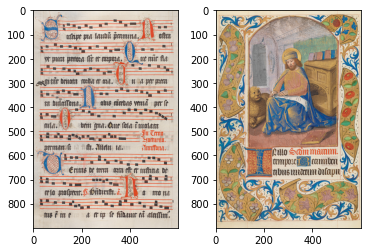

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from dia1a import *

def show_subplot_images(images: [Image]):
    for i, img in enumerate(images):
        print(img.format, img.size, img.mode)

        plt.subplot(1, 2, i + 1)
        plt.imshow(np.asarray(img))

test_images = ["aef-CSN-III-3-1_088-600x900.jpg", "utp-0101_016v-600x900.jpg"]

images = [load_image('../images/' + file_name) for file_name in test_images]

show_subplot_images(images)

## Examples of resize

None (120, 180) RGB
None (120, 180) RGB


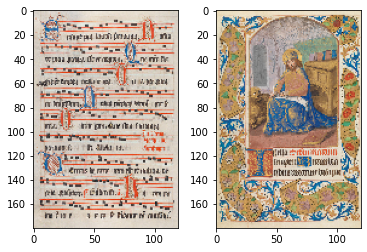

In [2]:
new_images = [resize(img) for img in images]
show_subplot_images(new_images)


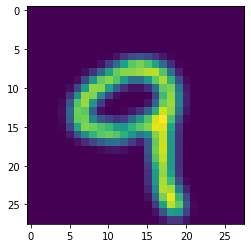

In [3]:
from scipy.ndimage import convolve
from dia1b import *


d = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,132,255,254,218,150,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,161,244,253,253,253,253,253,236,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,138,245,253,223,132,10,27,114,216,253,189,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,253,248,145,11,0,0,0,0,9,200,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,252,246,86,0,0,0,0,0,0,0,182,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,26,233,253,109,0,0,0,0,0,0,0,9,202,253,83,0,0,0,0,0,0,0,0,0,0,0,0,0,37,253,181,10,0,0,0,0,0,0,6,172,253,252,78,0,0,0,0,0,0,0,0,0,0,0,0,0,37,253,198,45,0,0,0,0,50,123,196,253,253,207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,195,253,242,213,213,126,88,245,253,248,251,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,109,201,226,253,253,243,119,82,0,199,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,51,51,41,0,0,0,239,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,239,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,239,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,253,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,253,247,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,251,253,189,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,253,253,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,190,198,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape((28,28))
gaussian_kernel = create_separable_kernel(np.array([1,2,1]))

d2 = convolve(d, gaussian_kernel)
plt.imshow(d2)


## Basic convolution application

In [4]:
# Test, to get the same results as in the exercise slides
# from scipy.ndimage import convolve

in_a = np.array([
    [7,6,5,5,6,7],
    [6,4,3,3,4,6],
    [5,3,2,2,3,5],
    [5,3,2,2,3,5],
    [6,4,3,3,4,6],
    [7,6,5,5,6,7]
])

# out_a = np.array([
#     [9,8,6,6,8,9],
#     [8,2,1,1,2,8],
#     [6,1,0,0,1,6],
#     [6,1,0,0,1,6],
#     [8,2,1,1,2,8],
#     [9,8,6,6,8,9]
# ])

k = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

res = convolve(in_a, k)

my_res = my_convolve(in_a, k)
print(my_res)

print(my_res == res)



[[9. 8. 6. 6. 8. 9.]
 [8. 2. 1. 1. 2. 8.]
 [6. 1. 0. 0. 1. 6.]
 [6. 1. 0. 0. 1. 6.]
 [8. 2. 1. 1. 2. 8.]
 [9. 8. 6. 6. 8. 9.]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


## Trying out the convolution on a grayscale


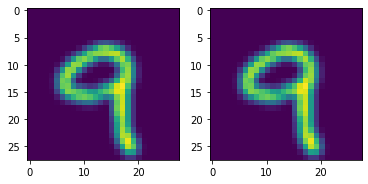

In [5]:
d2 = convolve(d, gaussian_kernel)
my_d2 = my_convolve(d, gaussian_kernel)

plt.subplot(1, 2, 1)
plt.imshow(d2)
plt.subplot(1, 2, 2)
plt.imshow(my_d2)



## Trying out the convolution on images
Not working...

In [6]:
img1 = images[0]


# Doesn't work....
# FIXME
# img2 = convolve(np.asarray(img1), create_lanczos_kernel(15, 2))
# my_img2 = my_convolve(np.asarray(img1), create_lanczos_kernel(15, 2))

# plt.subplot(1, 2, 1)
# plt.imshow(img2)
# plt.subplot(1, 2, 2)
# plt.imshow(my_img2)



## Trying out the convolution on grayscale with different parameters
Using `scipy`, as a support to better understand the Lanczos kernel and its different parameters.

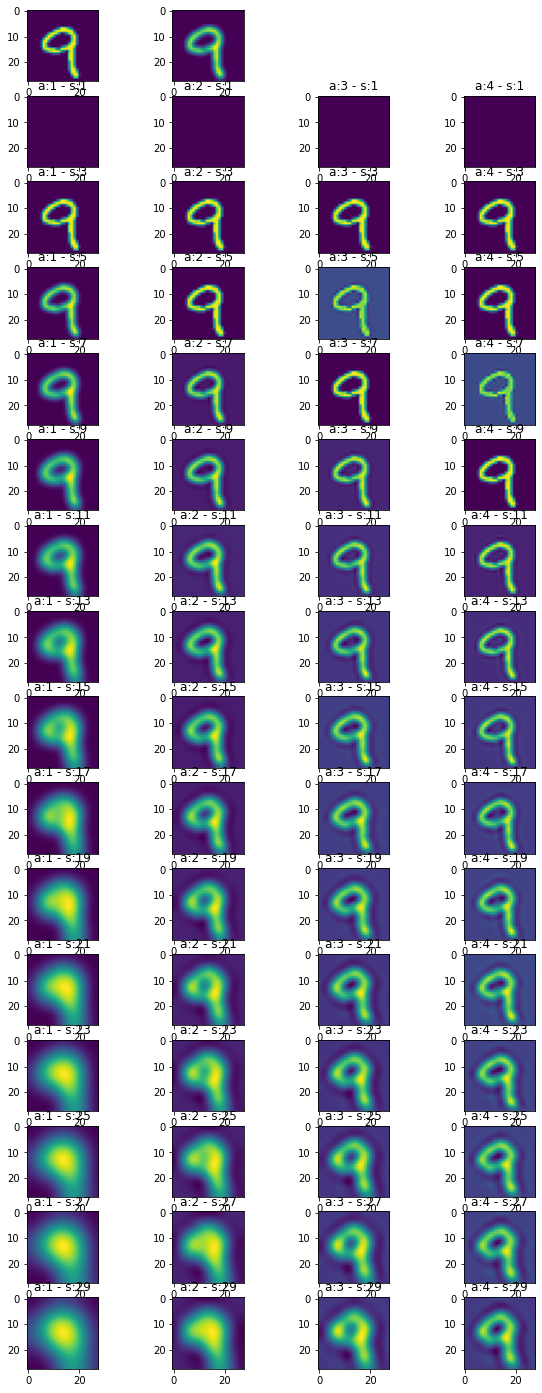

In [7]:
plt.figure(figsize=(10,25))
plt.subplot(16, 4, 1)
plt.imshow(d)
plt.subplot(16, 4, 2)
plt.imshow(d2)

sizes = [i for i in range(30) if i % 2 == 1]

for size_i, size in enumerate(sizes):
    for a in range(1, 5):
        lanczos_kernel = create_lanczos_kernel(size, a)
        d3 = convolve(d, lanczos_kernel)
        index = 4 + a + size_i * 4
        plt.subplot(16, 4, index)
        plt.imshow(d3)
        plt.title(f"a:{a} - s:{size}")